## Import Library


In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path_1 = 'gdrive/My Drive/DigitalSkola/Dataset/creditcard.csv'

df = pd.read_csv(path_1)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Cek Type data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Cek Missing Value dan Duplicate

In [5]:
df.isna().sum()/len(df.index)*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [14]:
df.duplicated().sum()

0

In [13]:
df.drop_duplicates(inplace= True)

## Membagi data labels dan target


In [16]:
X = df.drop(['Class'],1)
y = df['Class']

In [17]:
## normalisasi
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)

In [18]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3,random_state = 123)

In [25]:
## Cek data
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (198608, 30)
X_test shape: (85118, 30)
y_train shape: (198608,)
y_test shape: (85118,)


## Imbalance dataset

In [30]:
## cek jumlah value 
print(y_train.value_counts())
print(y_test.value_counts())

0    198284
1       324
Name: Class, dtype: int64
0    84969
1      149
Name: Class, dtype: int64


In [31]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_sm,y_train_sm = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [35]:
pd.Series(y_train_sm).value_counts()

1    198284
0    198284
dtype: int64

## Menggunakan Model DecisionTree

In [36]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 100, max_depth=3, min_samples_leaf= 5)
clf.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [37]:
## Accuracy Score Test
from sklearn.metrics import accuracy_score
y_test_sm_pred = clf.predict(X_test)
accuracy_score(y_test, y_test_sm_pred)

0.9563664559787589

In [38]:
## Accuracy Score Train
y_train_sm_pred = clf.predict(X_train_sm)
accuracy_score(y_train_sm, y_train_sm_pred)

0.9331716124346896

In [39]:
## Cross validasi Score test
from sklearn.model_selection import cross_val_score
print(cross_val_score(clf, X_test, y_test, cv=3))

[0.99904839 0.99975329 0.99922459]


In [42]:
## Cross validasi Predict
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(clf, X_test, y_test, cv=3)
confusion_matrix(y_test, predictions)

array([[84948,    21],
       [   35,   114]])

In [44]:
## Score Precision dan Recall
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(y_test, predictions))
print("Recall:",recall_score(y_test, predictions))

Precision: 0.8444444444444444
Recall: 0.7651006711409396


In [46]:
## mendapatkan kemungkinan prediksi
y_scores_clf = clf.predict_proba(X_test)
y_scores_clf = y_scores_clf[:,1]

In [47]:
## cek ROC_AUC Score
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_test, y_scores_clf)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9564585378591687


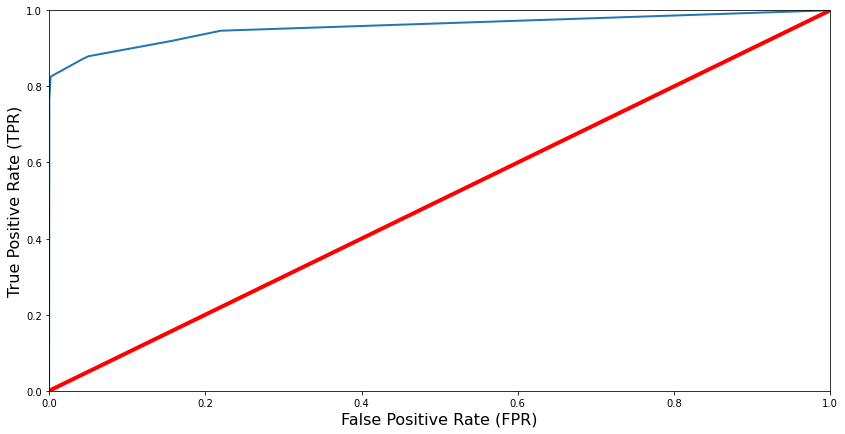

In [48]:
## ROC AUC Curve
from sklearn.metrics import roc_curve
# menghitung rasio positif benar dan rasio positif salah
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_clf)
# Membuat Plotting
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

## Menggunakan model Logistic Regression


In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.001, solver='liblinear', random_state=100)
lr.fit(X_train_sm, y_train_sm)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
## Accuracy Score Test
y_test_sm_pred = lr.predict(X_test)
accuracy_score(y_test, y_test_sm_pred)

0.9749054254094316

In [51]:
## Accuracy Score Train
y_train_sm_pred = lr.predict(X_train)
accuracy_score(y_train, y_train_sm_pred)

0.9754541609602836

In [52]:
## Cross validasi Score test
print(cross_val_score(lr, X_test, y_test, cv=3))

[0.99876643 0.99908364 0.9990836 ]


In [53]:
## Cross validasi Predick
predictions = cross_val_predict(lr, X_test, y_test, cv=3)
confusion_matrix(y_test, predictions)

array([[84956,    13],
       [   74,    75]])

In [54]:
## Score Precision dan Recall
print("Precision:", precision_score(y_test, predictions))
print("Recall:",recall_score(y_test, predictions))

Precision: 0.8522727272727273
Recall: 0.5033557046979866


In [61]:
## mendapatkan kemungkinan prediksi
y_scores_lr = lr.predict_proba(X_test)
y_scores_lr = y_scores_lr[:,1]

In [62]:
## cek ROC_AUC Score
r_a_score = roc_auc_score(y_test, y_scores_lr)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9807887693111289


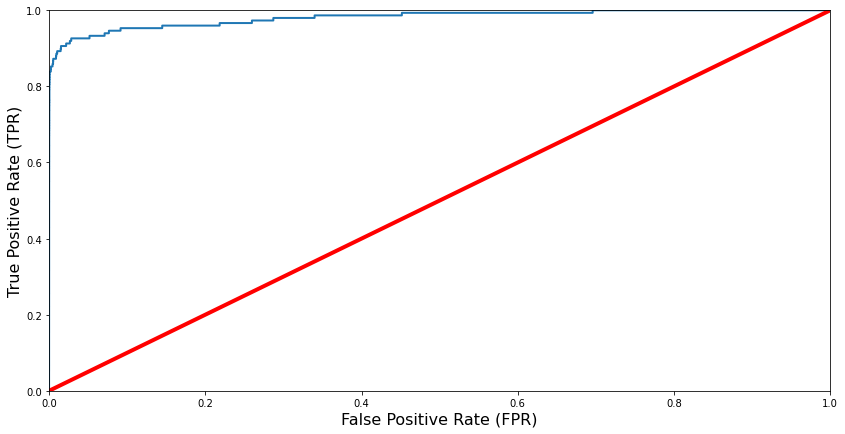

In [63]:
## ROC AUC Curve
from sklearn.metrics import roc_curve
# menghitung rasio positif benar dan rasio positif salah
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_lr)
# Membuat Plotting
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

## Prediksi yang melakukan kecurangan (0) dan tidak melakukan (1)

In [68]:
prediction_clf = clf.predict(X_test)
predik_clf = pd.DataFrame(data= prediction_clf, columns= ['Target'])
predik_clf.value_counts()

Target
0         81293
1          3825
dtype: int64

In [69]:
prediction_lr = lr.predict(X_test)
predik_lr = pd.DataFrame(data= prediction_lr, columns= ['Target'])
predik_lr.value_counts()

Target
0         82859
1          2259
dtype: int64